In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

In [2]:
import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

data = torch.tensor( iris[iris.columns[0:4]].values ).float()
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

In [5]:
train_data,test_data, train_labels,test_labels = train_test_split(data, labels, test_size=.2)
train_data = torch.utils.data.TensorDataset(train_data,train_labels)
test_data  = torch.utils.data.TensorDataset(test_data,test_labels)
batchsize    = 16
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [6]:
class theModelClass(nn.Module):
  def __init__(self,dropoutRate):
    super().__init__()
    self.input  = nn.Linear( 4,12)
    self.hidden = nn.Linear(12,12)
    self.output = nn.Linear(12, 3)

    self.dr = dropoutRate

  def forward(self,x):

    x = F.relu( self.input(x) )
    x = F.dropout(x,p=self.dr,training=self.training)

    x = F.relu( self.hidden(x) )
    x = F.dropout(x,p=self.dr,training=self.training)
    x = self.output(x)
    return x

In [7]:
tmpnet = theModelClass(.25)

# run some random data through
tmpdata = torch.randn((10,4))
yhat = tmpnet(tmpdata)
yhat

tensor([[-0.2847,  0.1780,  0.1540],
        [-0.2848,  0.1137,  0.0609],
        [-0.3031, -0.0090, -0.0285],
        [-0.3492,  0.1549, -0.0833],
        [-0.3499,  0.1231, -0.0093],
        [-0.4362,  0.2406, -0.0475],
        [-0.3316,  0.2281,  0.0362],
        [-0.3362,  0.2665, -0.0441],
        [-0.3096, -0.0792, -0.0909],
        [-0.3609,  0.1421,  0.0674]], grad_fn=<AddmmBackward0>)

In [9]:
def createANewModel(dropoutrate):

  ANNiris = theModelClass(dropoutrate)
  lossfun = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.005)

  return ANNiris,lossfun,optimizer

In [10]:
numepochs = 500

def trainTheModel():
  trainAcc = []
  testAcc  = []
  for epochi in range(numepochs):
    ANNiris.train()

    batchAcc = []
    for X,y in train_loader:

      yHat = ANNiris(X)
      loss = lossfun(yHat,y)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      batchAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )

    trainAcc.append( np.mean(batchAcc) )
    ANNiris.eval()
    X,y = next(iter(test_loader))
    predlabels = torch.argmax( ANNiris(X),axis=1 )
    testAcc.append( 100*torch.mean((predlabels == y).float()).item() )
  return trainAcc,testAcc

In [11]:
dropoutrate = .0
ANNiris,lossfun,optimizer = createANewModel(dropoutrate)

trainAcc,testAcc = trainTheModel()

NameError: name 'dropoutRates' is not defined

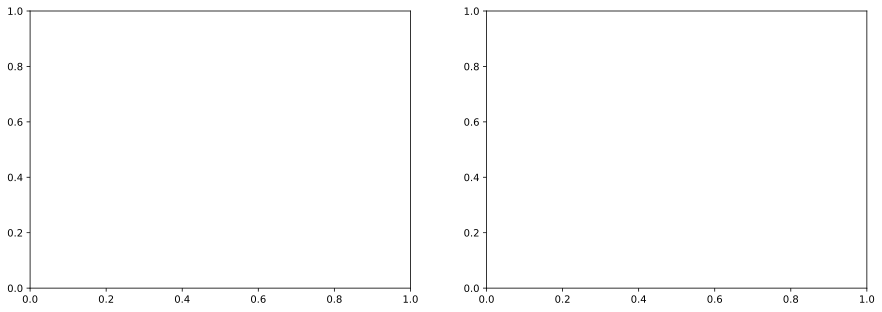

In [12]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(dropoutRates,results,'o-')
ax[0].set_xlabel('Dropout proportion')
ax[0].set_ylabel('Average accuracy')
ax[0].legend(['Train','Test'])

ax[1].plot(dropoutRates,-np.diff(results,axis=1),'o-')
ax[1].plot([0,.9],[0,0],'k--')
ax[1].set_xlabel('Dropout proportion')
ax[1].set_ylabel('Train-test difference (acc%)')

plt.show()
